In [1]:
import pandas as pd
import numpy as np
import json 
import pymongo as pm
import certifi
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read file 
superhero = pd.read_csv("imdb_superhero_2.csv")

# Print out top 5 rows of the file
superhero.head()

,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,77631,Grease,110.0,7.2,265183,TV-14::(D),6/13/1978,6000000.0,60759.0,394955690.0,"Comedy, Musical, Romance","John Travolta, Olivia Newton-John, Stockard Ch...",Randal Kleiser,"Allan Carr, Neil A. Machlis, Robert Stigwood","Paramount Pictures, Robert Stigwood Organizati..."
1,78346,Superman,143.0,7.4,172769,TV-PG::(LV),12/10/1978,55000000.0,7465343.0,166200000.0,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
2,77416,The Deer Hunter,183.0,8.1,334827,R,12/8/1978,15000000.0,NaN,NaN,"Drama, War","Robert De Niro, John Cazale, John Savage, Chri...",Michael Cimino,"Joann Carelli, Michael Cimino, Michael Deeley,...","EMI Films, Universal Pictures"
3,77651,Halloween,91.0,7.7,267109,TV-14,10/25/1978,300000.0,NaN,70000000.0,"Horror, Thriller","Donald Pleasence, Jamie Lee Curtis, Nancy Kyes...",John Carpenter,"Moustapha Akkad, John Carpenter, Debra Hill, K...","Compass International Pictures, Falcon Interna..."
4,77975,National Lampoon's Animal House,109.0,7.4,119917,"TV-14::(DLSV, TV Rating.)",7/27/1978,3000000.0,201747.0,3371006.0,Comedy,"Tom Hulce, Stephen Furst, Mark Metcalf, Mary L...",John Landis,"Ivan Reitman, Matty Simmons","Universal Pictures, Oregon Film Factory, Stage..."


In [3]:
# Open csv file
with open("credentials.json") as file:
  data = json.load(file)
  
  # Connect string
  connection_string = data["mongodb"]
  
  # Connect to the database with certificate
  db_connection_cert = pm.MongoClient(connection_string, tlsCAFile=certifi.where())
  
  # Fetch the database
  db = db_connection_cert["DB1"]
  
  # Retrieve database collections
  db_collections = db.list_collection_names()
  
  # Print out collections
  print(f"Using MongoDB version {db_connection_cert.server_info()['version']}.")
print(f"This database has the collections {db_collections}")

Using MongoDB version 5.0.13.
This database has the collections ['metacritic_movies', 'Superhero']


In [4]:
# Retrieve data from Superhero collection
superhero_data = db["Superhero"].find()

# Convert Superhero data to a dataframe
df = pd.DataFrame(superhero_data)

# Print the top 5 rows of dataframe
df.head()

,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,634c33717ad09522f6ac22d6,78346,Superman,143,7.4,172769,TV-PG::(LV),12/10/1978,55000000,7465343,166200000,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
1,634c33717ad09522f6ac22db,77413,Death on the Nile,140,7.2,34243,PG,6/20/1978,7920000,NULL,784489,"Crime, Drama, Mystery","Peter Ustinov, Jane Birkin, Lois Chiles, Bette...",John Guillermin,"John Brabourne, Richard Goodwin, Norton Knatch...","Mersham Productions Ltd., EMI Films"
2,634c33717ad09522f6ac22e2,77928,Midnight Express,121,7.5,79089,R,5/18/1978,2700000,NULL,NULL,"Biography, Crime, Drama, Thriller","Brad Davis, Irene Miracle, Bo Hopkins, Paolo B...",Alan Parker,"Peter Guber, Alan Marshall, David Puttnam","Columbia Pictures, Casablanca Filmworks"
3,634c33717ad09522f6ac22e3,78480,Watership Down,91,7.6,36440,TV-MA::(TV rating),10/14/1978,NULL,NULL,NULL,"Animation, Adventure, Drama, Thriller","John Hurt, Richard Briers, Michael Graham Cox,...","Martin Rosen, John Hubley","Jake Eberts, Martin Rosen","Nepenthe Productions, Watership Productions, E..."
4,634c33717ad09522f6ac22e8,77663,Heaven Can Wait,101,6.9,21157,PG,6/28/1978,NULL,4192799,NULL,"Comedy, Fantasy, Romance, Sport","Warren Beatty, Julie Christie, James Mason, Ja...","Warren Beatty, Buck Henry","Warren Beatty, Hawk Koch, Charles H. Maguire",Paramount Pictures


##### Comment: Analyzing the head of the dataframe I can see this data set has some null values in the following columns: budget, opening_weekend, and gross sales. Further analysis will be done to see if any of the other columns contain null values, specifically, with the columns of interest (runtime, release_date, and budget). 

### Handling Null Values

In [5]:
# Checking column datatypes and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48443 entries, 0 to 48442
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   _id              48443 non-null  object
 1   id               48443 non-null  object
 2   title            48443 non-null  object
 3   runtime          48418 non-null  object
 4   user_rating      48443 non-null  object
 5   votes            48443 non-null  object
 6   mpaa_rating      46827 non-null  object
 7   release_date     48443 non-null  object
 8   budget           31807 non-null  object
 9   opening_weekend  25228 non-null  object
 10  gross_sales      23372 non-null  object
 11  genres           48443 non-null  object
 12  cast             48443 non-null  object
 13  director         48443 non-null  object
 14  producer         48443 non-null  object
 15  company          48443 non-null  object
dtypes: object(16)
memory usage: 5.9+ MB


##### There are 48443 rows. From looking at the runtime and budget there are some null values. Further analysis will be done to check how many nulls reside in each column.

In [6]:
def null_breakdown(df=df):
  # Looping dataframe fields to get count of nulls in each column
  for col in df:
    count_null = df[col].isnull().sum()
    total_null_count = df[col].isna().count()
    percent_null = round(count_null/total_null_count*100, 2)
    print('{} has {} null values: {} percent null'.format(col, count_null, percent_null))

    #print('{} has {} null values: {} percent null'.format(col, count_null, percent_null))

null_breakdown()      

_id has 0 null values: 0.0 percent null
id has 0 null values: 0.0 percent null
title has 0 null values: 0.0 percent null
runtime has 25 null values: 0.05 percent null
user_rating has 0 null values: 0.0 percent null
votes has 0 null values: 0.0 percent null
mpaa_rating has 1616 null values: 3.34 percent null
release_date has 0 null values: 0.0 percent null
budget has 16636 null values: 34.34 percent null
opening_weekend has 23215 null values: 47.92 percent null
gross_sales has 25071 null values: 51.75 percent null
genres has 0 null values: 0.0 percent null
cast has 0 null values: 0.0 percent null
director has 0 null values: 0.0 percent null
producer has 0 null values: 0.0 percent null
company has 0 null values: 0.0 percent null


##### Columns with nulls: runtime, mpaa_rating, budget, opening_weeking, ross_sales

##### Only a small portion of columns in runtime have null values (.05%), these rows could either be removed or filled in. Budget has a little more than 30 percnet of the columns contain null values (34.34%), I will fill in these rows with the mode value for that column.

In [7]:
# Converting column rows of str 'NULL' to None 
def fillna_custom(col_name):
    for i,x in enumerate(df[col_name]):
      if x == 'NULL':
        df[col_name][i] = None
              
fillna_custom('runtime') 
fillna_custom('budget')       

# Replacing nan with column mode
df['runtime'].replace([np.nan], df['runtime'].mode()[0], inplace=True)
df['budget'].replace([np.nan], df['budget'].mode()[0], inplace=True)

df.head()


,_id,id,title,runtime,user_rating,votes,mpaa_rating,release_date,budget,opening_weekend,gross_sales,genres,cast,director,producer,company
0,634c33717ad09522f6ac22d6,78346,Superman,143,7.4,172769,TV-PG::(LV),12/10/1978,55000000,7465343,166200000,"Action, Adventure, Sci-Fi","Marlon Brando, Gene Hackman, Christopher Reeve...",Richard Donner,"Charles Greenlaw, Richard Lester, Alexander Sa...","Dovemead Films, Film Export A.G., Internationa..."
1,634c33717ad09522f6ac22db,77413,Death on the Nile,140,7.2,34243,PG,6/20/1978,7920000,NULL,784489,"Crime, Drama, Mystery","Peter Ustinov, Jane Birkin, Lois Chiles, Bette...",John Guillermin,"John Brabourne, Richard Goodwin, Norton Knatch...","Mersham Productions Ltd., EMI Films"
2,634c33717ad09522f6ac22e2,77928,Midnight Express,121,7.5,79089,R,5/18/1978,2700000,NULL,NULL,"Biography, Crime, Drama, Thriller","Brad Davis, Irene Miracle, Bo Hopkins, Paolo B...",Alan Parker,"Peter Guber, Alan Marshall, David Puttnam","Columbia Pictures, Casablanca Filmworks"
3,634c33717ad09522f6ac22e3,78480,Watership Down,91,7.6,36440,TV-MA::(TV rating),10/14/1978,5000000,NULL,NULL,"Animation, Adventure, Drama, Thriller","John Hurt, Richard Briers, Michael Graham Cox,...","Martin Rosen, John Hubley","Jake Eberts, Martin Rosen","Nepenthe Productions, Watership Productions, E..."
4,634c33717ad09522f6ac22e8,77663,Heaven Can Wait,101,6.9,21157,PG,6/28/1978,5000000,4192799,NULL,"Comedy, Fantasy, Romance, Sport","Warren Beatty, Julie Christie, James Mason, Ja...","Warren Beatty, Buck Henry","Warren Beatty, Hawk Koch, Charles H. Maguire",Paramount Pictures


Comparing this to the previous table, the nulls seem to have been dealt with. Another view at the null breakdown function will help to be sure that there are no more nulls present in the runtime and budget columns. 

In [8]:
null_breakdown(df)

_id has 0 null values: 0.0 percent null
id has 0 null values: 0.0 percent null
title has 0 null values: 0.0 percent null
runtime has 0 null values: 0.0 percent null
user_rating has 0 null values: 0.0 percent null
votes has 0 null values: 0.0 percent null
mpaa_rating has 1616 null values: 3.34 percent null
release_date has 0 null values: 0.0 percent null
budget has 0 null values: 0.0 percent null
opening_weekend has 23215 null values: 47.92 percent null
gross_sales has 25071 null values: 51.75 percent null
genres has 0 null values: 0.0 percent null
cast has 0 null values: 0.0 percent null
director has 0 null values: 0.0 percent null
producer has 0 null values: 0.0 percent null
company has 0 null values: 0.0 percent null


### Converting Datatypes

In [9]:
# Converting release data to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Checking the format of the relase date column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48443 entries, 0 to 48442
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id              48443 non-null  object        
 1   id               48443 non-null  object        
 2   title            48443 non-null  object        
 3   runtime          48443 non-null  object        
 4   user_rating      48443 non-null  object        
 5   votes            48443 non-null  object        
 6   mpaa_rating      46827 non-null  object        
 7   release_date     48443 non-null  datetime64[ns]
 8   budget           48443 non-null  object        
 9   opening_weekend  25228 non-null  object        
 10  gross_sales      23372 non-null  object        
 11  genres           48443 non-null  object        
 12  cast             48443 non-null  object        
 13  director         48443 non-null  object        
 14  producer         48443 non-null  objec

In [10]:
# Converting runtime to numeric datatype
df['runtime'] = pd.to_numeric(df['runtime'])
# Checking runtime datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48443 entries, 0 to 48442
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id              48443 non-null  object        
 1   id               48443 non-null  object        
 2   title            48443 non-null  object        
 3   runtime          48443 non-null  int64         
 4   user_rating      48443 non-null  object        
 5   votes            48443 non-null  object        
 6   mpaa_rating      46827 non-null  object        
 7   release_date     48443 non-null  datetime64[ns]
 8   budget           48443 non-null  object        
 9   opening_weekend  25228 non-null  object        
 10  gross_sales      23372 non-null  object        
 11  genres           48443 non-null  object        
 12  cast             48443 non-null  object        
 13  director         48443 non-null  object        
 14  producer         48443 non-null  objec

In [11]:
# Converting runtime to numeric datatype
df['budget'] = pd.to_numeric(df['budget'])
# Checking runtime datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48443 entries, 0 to 48442
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   _id              48443 non-null  object        
 1   id               48443 non-null  object        
 2   title            48443 non-null  object        
 3   runtime          48443 non-null  int64         
 4   user_rating      48443 non-null  object        
 5   votes            48443 non-null  object        
 6   mpaa_rating      46827 non-null  object        
 7   release_date     48443 non-null  datetime64[ns]
 8   budget           48443 non-null  float64       
 9   opening_weekend  25228 non-null  object        
 10  gross_sales      23372 non-null  object        
 11  genres           48443 non-null  object        
 12  cast             48443 non-null  object        
 13  director         48443 non-null  object        
 14  producer         48443 non-null  objec

In [12]:
# Getting runtime and budget statistics 
df.describe()

,runtime,budget
count,48443.000000,4.844300e+04
mean,105.377536,3.692629e+07
std,21.978268,8.616651e+08
min,44.000000,0.000000e+00
25%,91.000000,5.000000e+06
50%,100.000000,5.000000e+06
75%,114.000000,8.000000e+06
max,566.000000,1.200000e+11


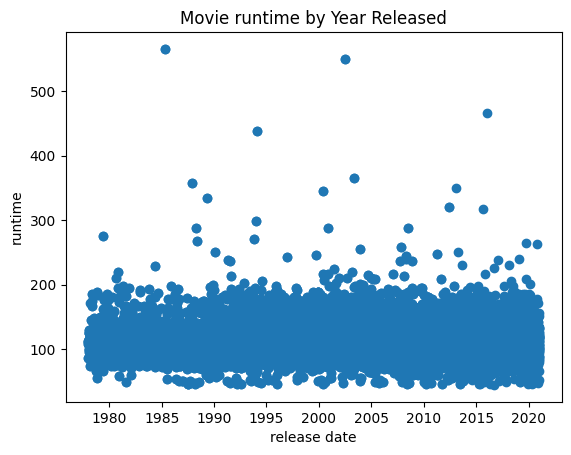

In [13]:
# Scatter plot to show a movie's runtime by its release date
x = df['release_date']
y = df['runtime']
plt.scatter(x, y)
plt.title('Movie runtime by Year Released')
plt.xlabel('release date')
plt.ylabel('runtime')
plt.show()

From the looks of this, I can see that there are quite a few outliers above the max value.

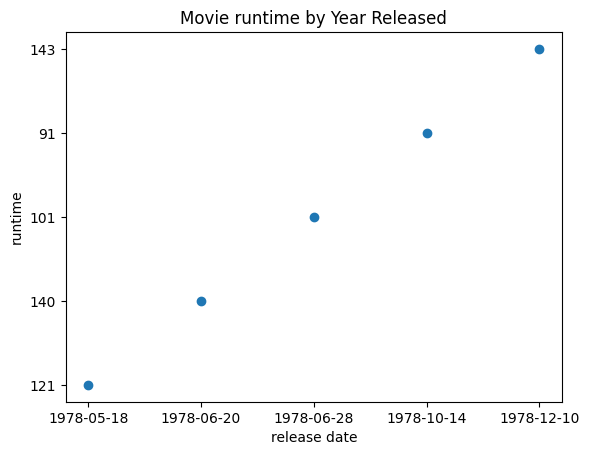

In [30]:
dataset = {
  "release_date": ["1978-05-18", "1978-06-20", "1978-06-28", "1978-10-14", "1978-12-10"],
  "runtime": ["121", "140", "101", "91", "143"]
}

plt.scatter(dataset['release_date'], dataset['runtime'])
plt.title('Movie runtime by Year Released')
plt.xlabel('release date')
plt.ylabel('runtime')
plt.show()

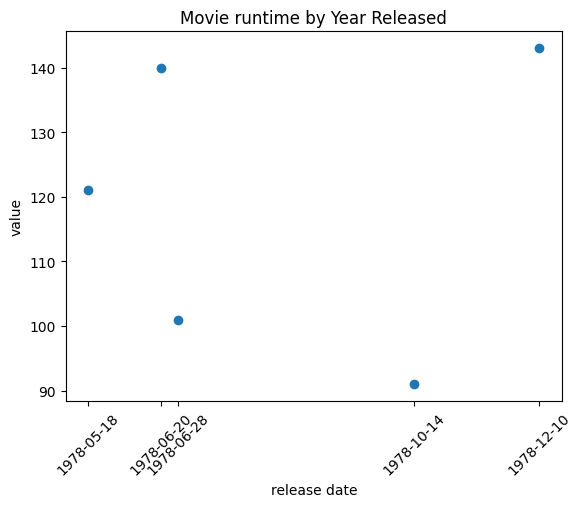

In [51]:
dataset = {
  "release_date": ["1978-05-18", "1978-06-20", "1978-06-28", "1978-10-14", "1978-12-10"],
  "runtime": ["121", "140", "101", "91", "143"]
}

df_head = pd.DataFrame(dataset)
df_head.release_date = pd.to_datetime(df_head['release_date'], errors='coerce')
df_head.runtime = pd.to_numeric(df_head['runtime'], errors='coerce')

plt.scatter(df_head['release_date'], df_head['runtime'])
plt.title('Movie runtime by Year Released')
plt.xlabel('release date')
plt.ylabel('value')
plt.xticks(dataset['release_date'], rotation=45)
plt.show()

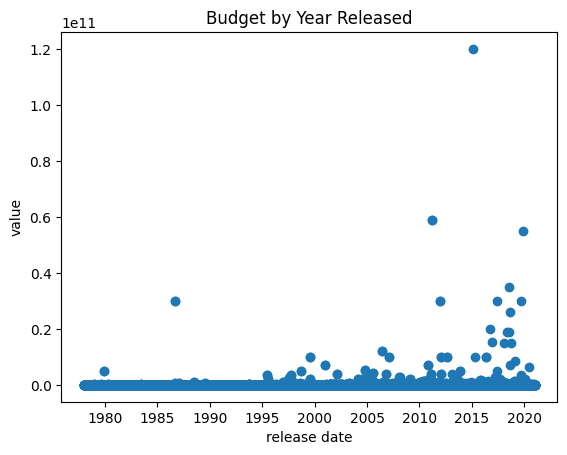

In [16]:
# Scatter plot to show a movies budget by the release date in years.
x = df['release_date']
y = df['budget']
plt.scatter(x, y)
plt.title('Budget by Year Released')
plt.xlabel('release date')
plt.ylabel('value')
plt.show()

Looking at the chart above,there are visible outlier above the max value. 

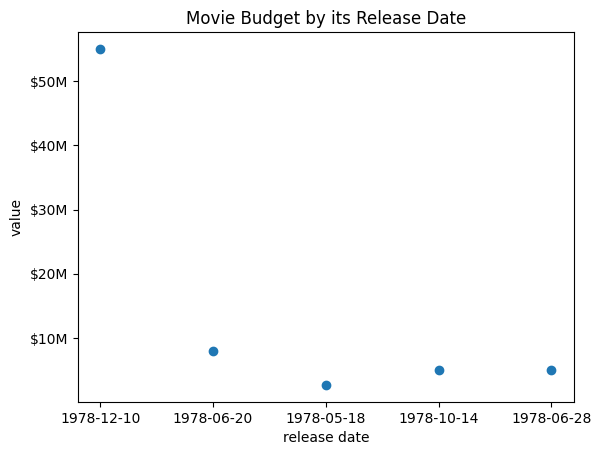

In [17]:
df_head = {
  "release_date": ["1978-12-10", "1978-06-20", "1978-05-18", "1978-10-14", "1978-06-28"],
  "budget": [55_000_000, 7_920_000, 2_700_000, 5_000_000, 5_000_000]
}

# Formating currency function was used from Ted Spence's github
# A custom formatter for currency
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"
    
plt.scatter(df_head['release_date'], df_head['budget'])
plt.title('Movie Budget by its Release Date')
plt.xlabel('release date')
plt.ylabel('value')
plt.gca().yaxis.set_major_formatter(format_currency)
plt.show()    

### Detecting Outliers

A boxplot will give us a clearer view to help further visualize these outliers.

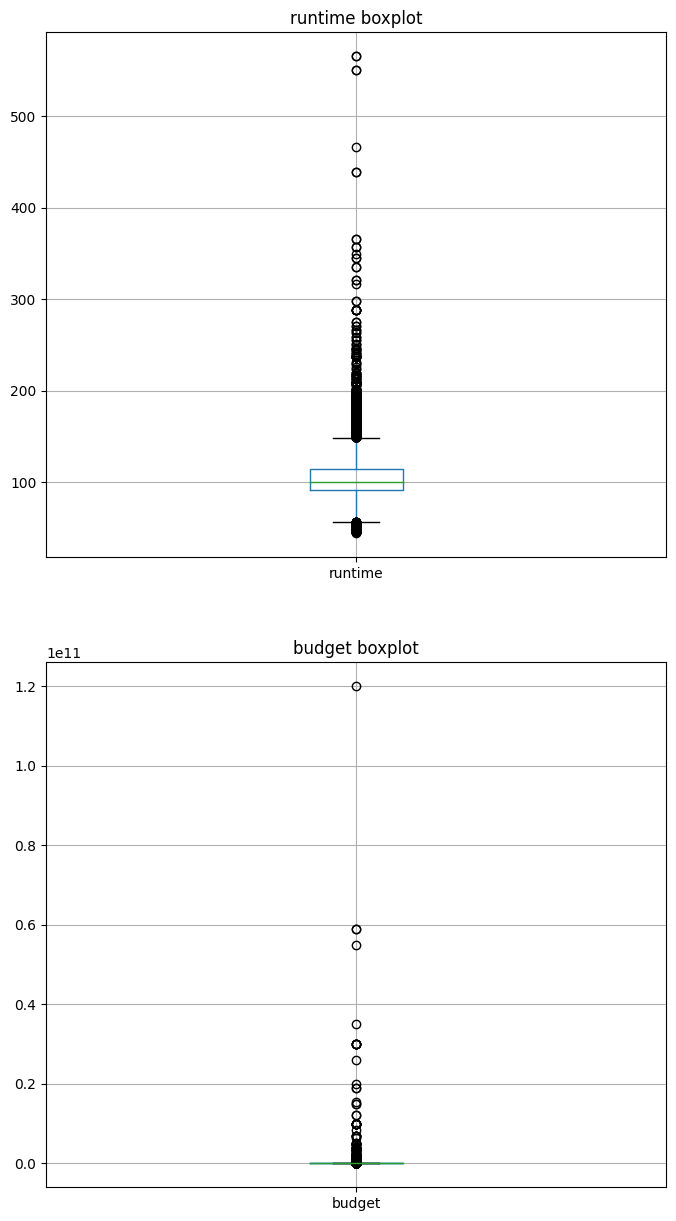

In [18]:
# Boxplot of the variables runtime and budget to check possible outliers
plt.figure(figsize=(8,15))
for i, col in enumerate(['runtime', 'budget'], start=1):
    plt.subplot(2, 1, i)
    plt.title('{} boxplot'.format(col))
    df.boxplot(col)

Next I will start detecting the outliers in both runtime and budget 

In [19]:
# Assigning an empty array to hold outliers
outliers=[]
# Funtion to find outliers in runtime and budget and returning the outliers to the outliers list. 
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    outliers.sort()        
    return outliers
  
print(detect_outlier(df['runtime']))
print(detect_outlier(df['budget']))

[172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 172, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 173, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 174, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 175, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 176, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 177, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,

In [20]:
# sort the data
pd.Series(df.runtime, df.budget)

budget
55000000.0      NaN
7920000.0       NaN
2700000.0       NaN
5000000.0       NaN
5000000.0       NaN
              ...  
5000000.0       NaN
250000.0        NaN
5000000.0       NaN
4000.0        100.0
5000000.0       NaN
Name: runtime, Length: 48443, dtype: float64

In [21]:
# Using IQR to detect outliers
col_list = [df['runtime'], df['budget']]

for col in col_list:
  
  q1=col.quantile(0.25)
  q3=col.quantile(0.75)
  
  IQR= q3-q1
  
  lower = q1 - (1.5 * IQR)
  upper = q3 + (1.5 * IQR)
  
  print('q1 is {} and q3 is {}'.format(q1, q3))
  print('iqr is {}'.format(IQR))
  print('lower bound is {} and upper bound is {}\n'.format(lower, upper))
  

q1 is 91.0 and q3 is 114.0
iqr is 23.0
lower bound is 56.5 and upper bound is 148.5

q1 is 5000000.0 and q3 is 8000000.0
iqr is 3000000.0
lower bound is 500000.0 and upper bound is 12500000.0



In the output above, the first part contains statistics for the runtime and the second parts is for the budget. 

In [22]:
# Function to find outliers using IQR
def find_outliers_IQR(col_name):
   q1=col_name.quantile(0.25)
   q3=col_name.quantile(0.75)
   IQR = q3 - q1
   outliers = col_name[((col_name<(q1-1.5*IQR)) | (col_name>(q3+1.5*IQR)))]
   return outliers


# Passing runtime and budget through the function and return outliers in the dataset
outliers = find_outliers_IQR(df[['runtime', 'budget']])
print('number of outliers:' + str(len(outliers)))
print('max outlier value: ' + str(outliers.max()))
print('min outlier value: ' + str(outliers.min()))  
outliers
  

number of outliers:48443
max outlier value: runtime    5.660000e+02
budget     1.200000e+11
dtype: float64
min outlier value: runtime    44.0
budget      0.0
dtype: float64


,runtime,budget
0,NaN,55000000.0
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
48438,NaN,NaN
48439,NaN,250000.0
48440,164.0,NaN
48441,45.0,4000.0


In the table above, NaN means the value is not an outlier

### Conclusion

After analyzing the data in the superhero dataset I found that the two of the columns of interest contains null values after looking at the head of the dataframe. I was able to detect these using the pandas dataframe function, info(). This gave an overview of the columns non-null count didn't add up to 48443 and the datatypes of each column. I then did a further analysis by creating a null breakdown function to get the total number of nulls and the percent of the columns that the null values took up. I then replaced these null values with the mode since the columns were an object datatype. After successfully completing this, I went on to convert the data types to the types specified in the assignment for each column of interest. From here, I graphed scatterplots of each column by the release data. Since there is a lot of data I wanted to get a better view of how this data looks using only the data in the head of the dataframe so I created a new dataframe for each column to get a better observation of these points. From the scatter plots using all the column rows I noticed some possible outliers in the data. To look into these furthe, I created ploxplots for the runtime and budget which showed that there are definitely outliers. To look deeper into this I used IQR to find the ranges to see which of these points are outliers and then the upper and lower limits to see where the top outliers reside. To tackle these outliers, the best way to handle these outliers, from the research I've done is using the winsorization method by finding the upper and lower limit percentiles and then recoding the data accordingly. Winsorizing data means to set extreme outliers equal to a specified percentile of data; changes extreme values to less extreme values in the dataset. For example, if you were to perfrom a 90% winsorization in the dataset, you would find the 5th and 95th percentiles and any values below the 5th percentile you would change to the 5th percentile value and any values that fall below the 95th percentile value would be set to that value. The best way to filter the data would be by the release date. The reason for this, seen from the data_head scatterplot where the information is plotted in a somewhat linear fashion. 